## Airline Satisfaction Survey - Preliminary Data Analysis and Cleaning

The Python code included in this Jupyter Notebook is used to clean the both train and test datasets taken from https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction. 

Based on these datasets I have cleaned and conducted a preliminary analysis to visualize data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_data = train.drop(['Unnamed: 0', 'id'], axis=1)
test_data = test.drop(['Unnamed: 0', 'id'], axis=1)

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [3]:
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12983,12983,9428,Male,Loyal Customer,57,Business travel,Business,299,2,2,...,4,4,4,4,5,4,4,23,18.0,satisfied
12984,12984,123249,Male,Loyal Customer,49,Personal Travel,Eco,328,2,0,...,4,5,4,5,4,5,4,0,8.0,neutral or dissatisfied
12985,12985,75455,Male,Loyal Customer,56,Business travel,Business,830,1,3,...,1,1,1,1,1,1,4,0,0.0,neutral or dissatisfied
12986,12986,12684,Male,Loyal Customer,46,Business travel,Eco,689,3,3,...,3,2,4,3,5,3,3,5,3.0,satisfied


In [4]:
#Changing 'disloyal Customer' column to 'Disloyal Customer' in both datasets.
train_data['Customer Type'] = train_data['Customer Type'].map({'disloyal Customer': 'Disloyal Customer','Loyal Customer':'Loyal Customer'})
test_data['Customer Type'] = test_data['Customer Type'].map({'disloyal Customer': 'Disloyal Customer', 'Loyal Customer':'Loyal Customer'})

#Changing 'neutral or dissatisfied' to just 'dissatisfied' since we assumed neutral as dissatisfied
train_data['satisfaction'] = train_data['satisfaction'].map({'neutral or dissatisfied' : 'Neutral or Dissatisfied', 'satisfied':'Satisfied'})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied': 'Neutral or Dissatisfied', 'satisfied': 'Satisfied'})


In [5]:
#Showing satisfaction levels based on 'Gender' variable
train_data['Gender'].value_counts(normalize=True)

Female    0.509336
Male      0.490664
Name: Gender, dtype: float64

In [6]:
#Showing satisfaction levels based on 'Customer Type' variable
train_data['Customer Type'].value_counts(normalize=True)

Loyal Customer       0.816022
Disloyal Customer    0.183978
Name: Customer Type, dtype: float64

In [7]:
#Showing satisfaction levels based on 'Type of Travel' variable
train_data['Type of Travel'].value_counts(normalize=True)

Business travel    0.689386
Personal Travel    0.310614
Name: Type of Travel, dtype: float64

In [8]:
#Showing satisfaction levels based on 'Class' variable
train_data['Class'].value_counts(normalize=True)

Business    0.476421
Eco         0.451359
Eco Plus    0.072221
Name: Class, dtype: float64

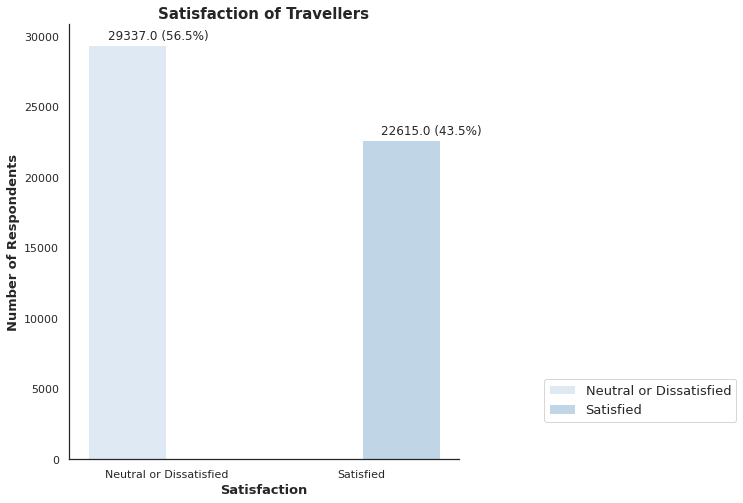

In [9]:
#Satisfaction of Travellers

sns.set_theme(style='white', palette='Blues')

plt.figure(figsize=[7,8])
ax = sns.countplot(x='satisfaction', hue='satisfaction', data=train_data)
ax.set_xticklabels(['Neutral or Dissatisfied','Satisfied'])
for s in ax.patches:
    ax.annotate(str(s.get_height())+' ('+str((s.get_height()/len(train_data)*100).round(1))+'%)', (s.get_x()+0.1, s.get_height()+400))
                                                                                           
plt.title('Satisfaction of Travellers', weight='bold', fontsize=15)
plt.xlabel('Satisfaction', weight='bold', fontsize=13)
plt.ylabel('Number of Respondents', weight='bold', fontsize=13)
plt.legend( bbox_to_anchor=(1.2, 0.2),fontsize=13)
sns.despine()
plt.show()

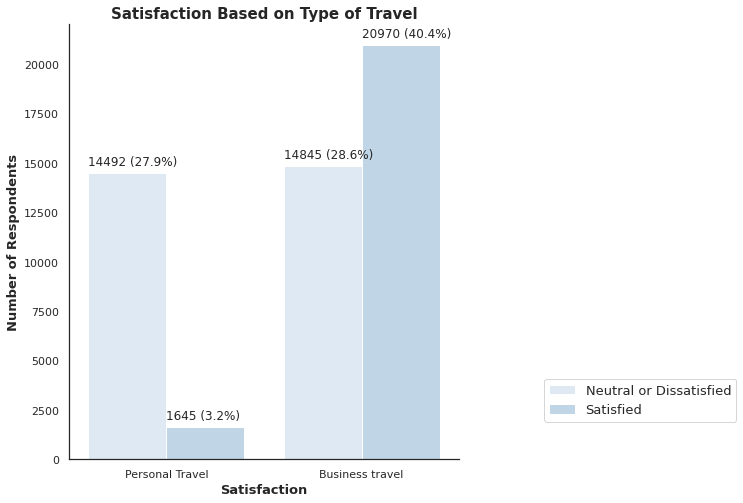

In [10]:
#Satisfaction Based on Type of Travel

sns.set_theme(style='white', palette='Blues')

plt.figure(figsize=[7,8])
ax = sns.countplot(x='Type of Travel', hue='satisfaction', data=train_data)

for s in ax.patches:
     ax.annotate(str(s.get_height())+' ('+str((s.get_height()/len(train_data)*100).round(1))+'%)', (s.get_x()+0.0001, s.get_height()+400))
                                                                                           
plt.title('Satisfaction Based on Type of Travel', weight='bold', fontsize=15)
plt.xlabel('Satisfaction', weight='bold', fontsize=13)
plt.ylabel('Number of Respondents', weight='bold', fontsize=13)
plt.legend( bbox_to_anchor=(1.2, 0.2),fontsize=13)
sns.despine()
plt.show()

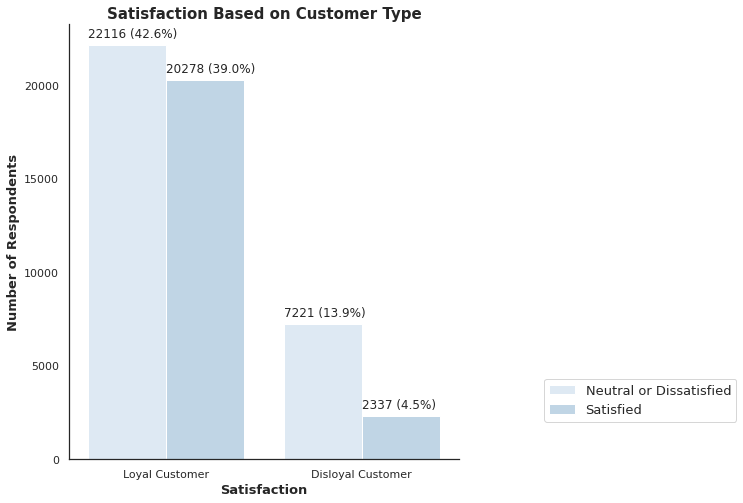

In [11]:
#Satisfaction Based on Customer Type

sns.set_theme(style='white', palette='Blues')

plt.figure(figsize=[7,8])
ax = sns.countplot(x='Customer Type', hue='satisfaction', data=train_data)

for s in ax.patches:
    ax.annotate(str(s.get_height())+' ('+str((s.get_height()/len(train_data)*100).round(1))+'%)', (s.get_x()+0.0001, s.get_height()+400))
                                                                                           
plt.title('Satisfaction Based on Customer Type', weight='bold', fontsize=15)
plt.xlabel('Satisfaction', weight='bold', fontsize=13)
plt.ylabel('Number of Respondents', weight='bold', fontsize=13)
plt.legend( bbox_to_anchor=(1.2, 0.2),fontsize=13)
sns.despine()
plt.show()

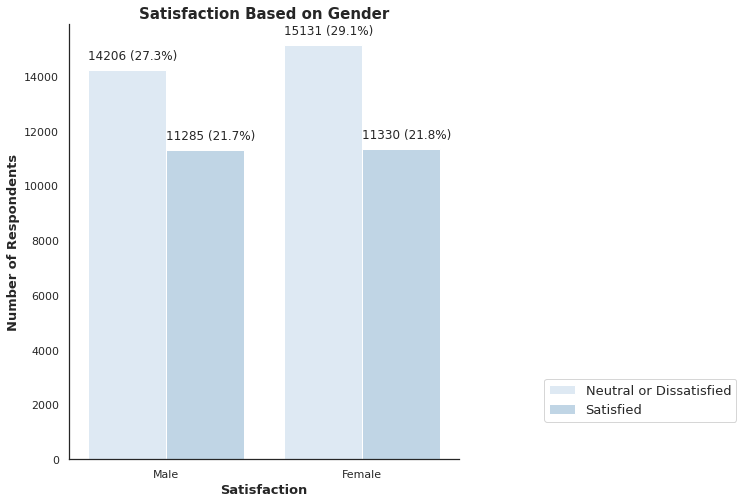

In [12]:
#Satisfaction Based on Gender

sns.set_theme(style='white', palette='Blues')

plt.figure(figsize=[7,8])
ax = sns.countplot(x='Gender', hue='satisfaction', data=train_data)

for s in ax.patches:
     ax.annotate(str(s.get_height())+' ('+str((s.get_height()/len(train_data)*100).round(1))+'%)', (s.get_x()+0.0001, s.get_height()+400))
plt.title('Satisfaction Based on Gender', weight='bold', fontsize=15)
plt.xlabel('Satisfaction', weight='bold', fontsize=13)
plt.ylabel('Number of Respondents', weight='bold', fontsize=13)
plt.legend( bbox_to_anchor=(1.2, 0.2),fontsize=13)
sns.despine()
plt.show()

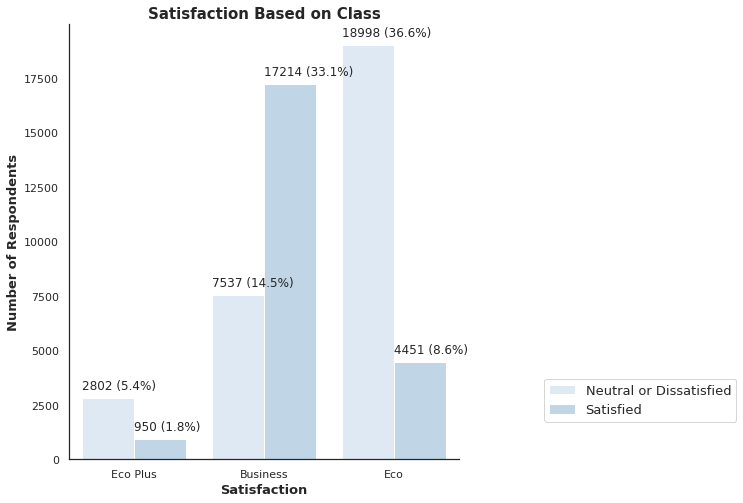

In [13]:
#Satisfaction Based on Class

sns.set_theme(style='white', palette='Blues')

plt.figure(figsize=[7,8])
ax = sns.countplot(x='Class', hue='satisfaction', data=train_data)

for s in ax.patches:
    ax.annotate(str(s.get_height())+' ('+str((s.get_height()/len(train_data)*100).round(1))+'%)', (s.get_x()+0.0001, s.get_height()+400))
                                                                                           
plt.title('Satisfaction Based on Class', weight='bold', fontsize=15)
plt.xlabel('Satisfaction', weight='bold', fontsize=13)
plt.ylabel('Number of Respondents', weight='bold', fontsize=13)
plt.legend( bbox_to_anchor=(1.2, 0.2),fontsize=13)
sns.despine()
plt.show()

In [14]:
#Creating dummy variables here after we done the preliminary analysis for categorical variables
dummy_variable_gender_train = pd.get_dummies(train_data['Gender'])
train_data['Gender'] = dummy_variable_gender_train.cumsum(axis=1).ne(1).sum(axis=1)

dummy_variable_customer_type_train = pd.get_dummies(train_data['Customer Type'])
train_data['Customer Type'] = dummy_variable_customer_type_train.cumsum(axis=1).ne(1).sum(axis=1)

dummy_variable_travel_type_train = pd.get_dummies(train_data['Type of Travel'])
train_data['Type of Travel'] = dummy_variable_travel_type_train.cumsum(axis=1).ne(1).sum(axis=1)

dummy_variable_class_train = pd.get_dummies(train_data['Class'])
train_data['Class'] = dummy_variable_class_train.cumsum(axis=1).ne(1).sum(axis=1)

dummy_variable_satisfaction_train = pd.get_dummies(train_data['satisfaction'])
train_data['satisfaction'] = dummy_variable_satisfaction_train.cumsum(axis=1).ne(1).sum(axis=1)


dummy_variable_gender_test = pd.get_dummies(train_data['Gender'])
test_data['Gender'] = dummy_variable_gender_test.cumsum(axis=1).ne(1).sum(axis=1)

dummy_variable_customer_type_test = pd.get_dummies(train_data['Customer Type'])
test_data['Customer Type'] = dummy_variable_customer_type_test.cumsum(axis=1).ne(1).sum(axis=1)

dummy_variable_travel_type_test = pd.get_dummies(train_data['Type of Travel'])
test_data['Type of Travel'] = dummy_variable_travel_type_test.cumsum(axis=1).ne(1).sum(axis=1)

dummy_variable_class_test = pd.get_dummies(train_data['Class'])
test_data['Class'] = dummy_variable_class_test.cumsum(axis=1).ne(1).sum(axis=1)

dummy_variable_satisfaction_test = pd.get_dummies(train_data['satisfaction'])
test_data['satisfaction'] = dummy_variable_satisfaction_test.cumsum(axis=1).ne(1).sum(axis=1)

In [15]:
#Creating correlation Matrix to see correlation between different variables
train_data.corr()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,0.031677,0.003854,0.006918,-0.011075,0.009602,0.013537,0.010207,0.006168,-0.000525,...,0.009746,0.008896,0.031427,0.038214,0.011461,0.039936,0.010125,0.010712,0.008110,0.014649
Customer Type,0.031677,1.000000,0.282351,0.309918,-0.036124,0.226083,0.005475,0.207777,0.015494,-0.007099,...,0.115541,0.060600,0.049218,-0.028423,0.029240,-0.025745,0.090057,-0.004218,-0.003842,0.182727
Age,0.003854,0.282351,1.000000,-0.049694,-0.111542,0.094324,0.017330,0.033834,0.023040,-0.003936,...,0.074571,0.053509,0.038274,-0.050436,0.035523,-0.053142,0.056069,-0.007511,-0.009522,0.134522
Type of Travel,0.006918,0.309918,-0.049694,1.000000,0.484027,-0.266333,-0.112945,0.263332,-0.135973,-0.030058,...,-0.149103,-0.046939,-0.140346,-0.028045,0.020962,-0.019673,-0.080094,-0.008518,-0.008589,-0.451332
Class,-0.011075,-0.036124,-0.111542,0.484027,1.000000,-0.427743,-0.024494,0.090368,-0.094766,-0.003130,...,-0.177127,-0.207900,-0.204295,-0.166932,-0.154805,-0.161270,-0.124179,0.006099,0.010413,-0.445532
Flight Distance,0.009602,0.226083,0.094324,-0.266333,-0.427743,1.000000,0.010837,-0.021323,0.064139,0.006570,...,0.131492,0.109202,0.131697,0.061948,0.069918,0.056024,0.095295,0.003252,-0.000856,0.299185
Inflight wifi service,0.013537,0.005475,0.017330,-0.112945,-0.024494,0.010837,1.000000,0.338493,0.712169,0.332055,...,0.206716,0.114416,0.157988,0.117162,0.041482,0.107777,0.134880,-0.017741,-0.019870,0.285636
Departure/Arrival time convenient,0.010207,0.207777,0.033834,0.263332,0.090368,-0.021323,0.338493,1.000000,0.434019,0.443024,...,-0.006010,0.071040,0.014847,0.073870,0.090523,0.074415,0.015155,0.002238,0.000402,-0.056610
Ease of Online booking,0.006168,0.015494,0.023040,-0.135973,-0.094766,0.064139,0.712169,0.434019,1.000000,0.455220,...,0.044056,0.033722,0.105041,0.037920,0.013214,0.036644,0.016920,-0.004697,-0.006105,0.170517
Gate location,-0.000525,-0.007099,-0.003936,-0.030058,-0.003130,0.006570,0.332055,0.443024,0.455220,1.000000,...,0.000846,-0.028727,-0.006726,0.003869,-0.030435,0.007210,-0.005418,0.005501,0.004738,-0.002037


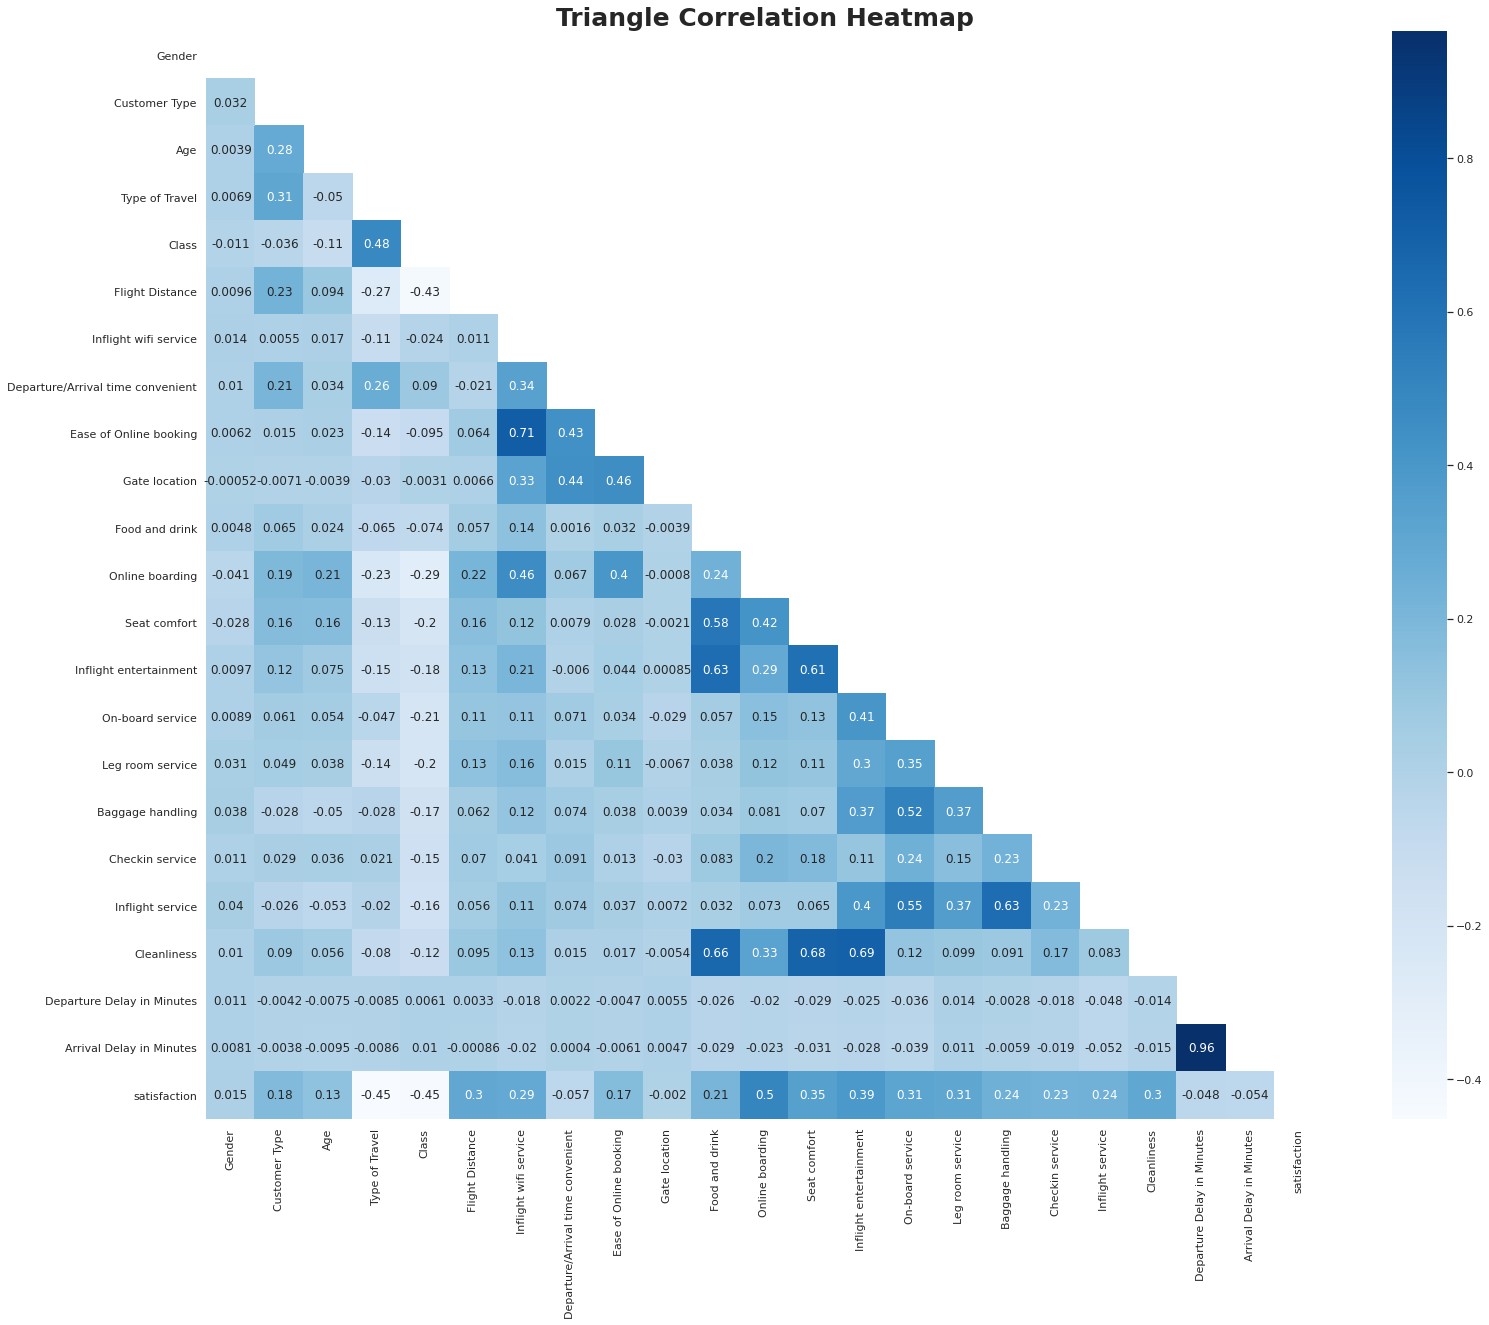

In [16]:
#Illustrating the correlation matrix with Triangle Correlation Heatmap
mask = np.triu(np.ones_like(train_data.corr(), dtype=np.bool))

plt.figure(figsize=(25, 20))
sns.heatmap(train_data.corr(), cmap='Blues', mask=mask,  annot=True)
plt.title('Triangle Correlation Heatmap', fontsize=25, weight='bold')
plt.show()

In [17]:
#Saving both train and test dataframes to csv file
train_data.to_csv('train_updated.csv')
test_data.to_csv('test_updated.csv')